In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../flaming-choripan')

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd - 1.811[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN_kfid-0.slcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3_kfid-0.slcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe_kfid-0.slcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset(
(raw - samples 1,099)
 - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806)
 - max_length_serial: 205 - max_duration: 578.23[days]
   |▏       | SLSN - 21/1,099 (1.91%)
   |█████▊  | SNIa - 799/1,099 (72.70%)
   |▎       | SNIbc - 51/1,099 (4.64%)
   |█▋      | merSNII - 228/1,099 (20.75%)
(raw_train - samples 877)
 - samples: 877 - obs samples: 24,182 (g: 10,010 - r: 14,172)
 - max_length_serial: 205 - max_duration: 578.23[days]
   |▏       | SLSN - 16/877 (1.82%)
   |█████▊  | SNIa - 639/877 (72.86%)
   |▎       | SNIbc - 40/877 (4.56%)
   |█▋      | merSNII - 182/877 (20.75%)
(raw_val - samples 222)
 - samples: 222 - obs samples: 6,164 (g: 2,530 - r: 3,634)
 - max_length_serial: 108 - max_duration: 489.71[days]
   |▏       | SLSN - 5/222 (2.25%)
   |██

# get error distribution fit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


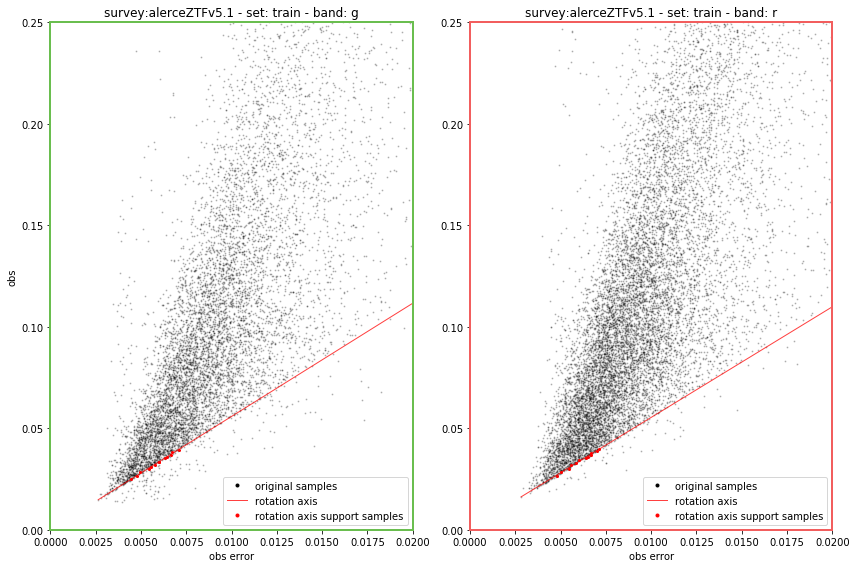

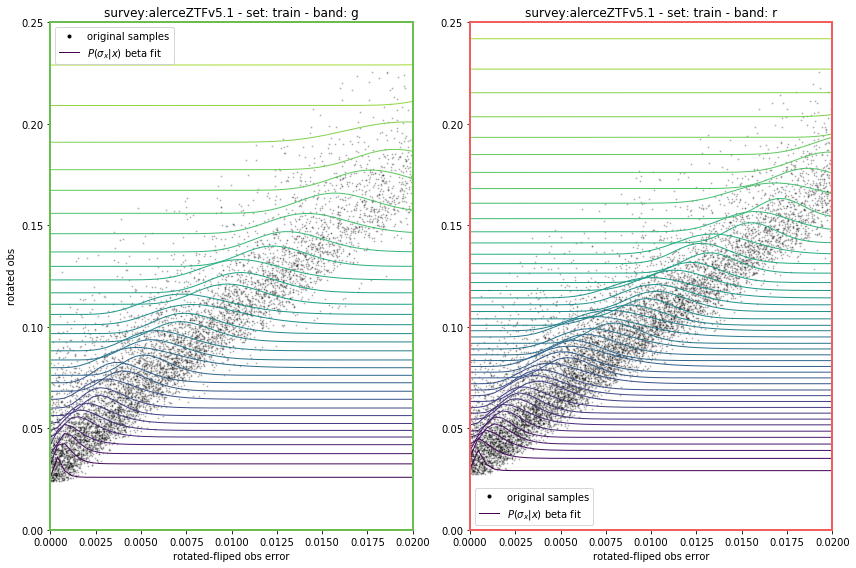

In [311]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import ObsErrorConditionalSampler
from lchandler.plots.plots import plot_obse_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
obse_sampler_bdict = {b:ObsErrorConditionalSampler(lcdataset, set_name, b) for b in band_names}
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


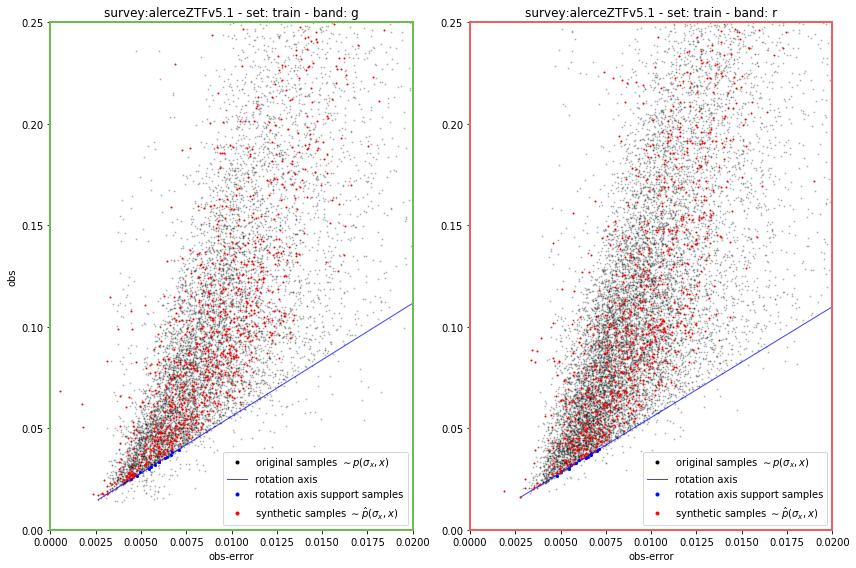

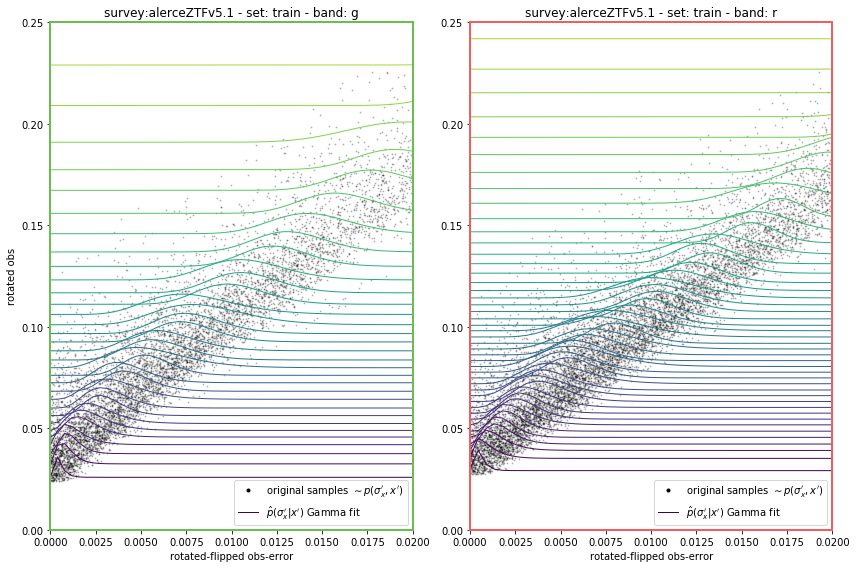

In [328]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obse_samplers

plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=1, add_samples=1)
plot_obse_samplers(lcdataset, set_name, obse_sampler_bdict, original_space=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


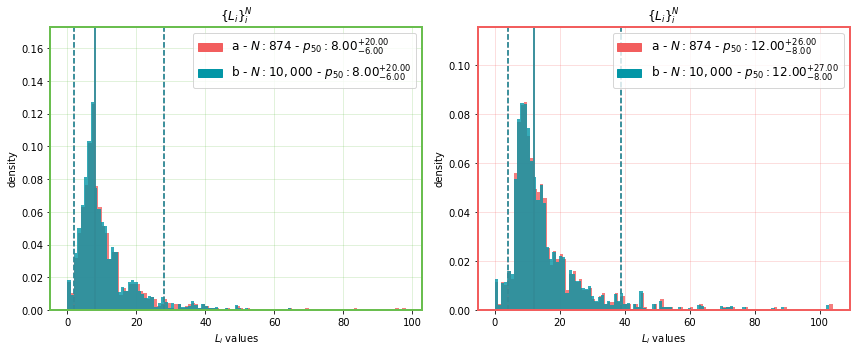

In [13]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.distr_fitting import CurveLengthSampler
from lchandler.plots.plots import plot_length_samplers

set_name = 'train'
band_names = lcdataset[set_name].band_names
length_sampler_bdict = {b:CurveLengthSampler(lcdataset, set_name, b) for b in band_names}
plot_length_samplers(length_sampler_bdict, lcdataset, set_name)

In [ ]:
'ZTF19abajxet'
ZTF19aapfnym
ZTF19aadpqnb
ZTF19aaksrlb
ZTF18acwvcbz
ZTF19aariwfe

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ZTF19aariwfe


Text(0.5, 1.0, 'ZTF19aariwfe merSNII')

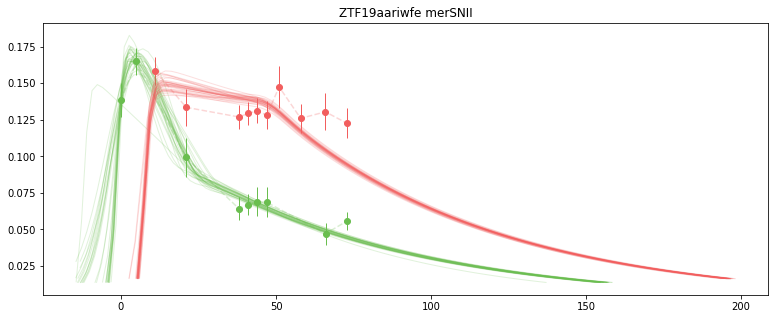

In [113]:
%load_ext autoreload
%autoreload 2
import lchandler.synthetic.synthetic_curve_generators
from lchandler.synthetic.synthetic_curve_generators import SynSNeGeneratorCF, SynSNeGeneratorMCMC
from lchandler.plots.lc import plot_lightcurve
from flamingchoripan.datascience.statistics import XError
import matplotlib.pyplot as plt
from lchandler import C_

set_name = 'train'
lc_set = lcdataset[set_name]
lcobj_name = lc_set.get_random_lcobj_name()
lcobj_name = 'ZTF19aariwfe'
print(lcobj_name)
lcobj = lc_set[lcobj_name]
band_names = lc_set.band_names
new_bounds = 1
sne_generator = SynSNeGeneratorCF(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
#sne_generator = SynSNeGeneratorMCMC(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict, new_bounds=new_bounds)
new_lcobjs = sne_generator.sample_curves(32, uses_pm_obs=1)

fig, ax = plt.subplots(1,1,figsize=(13,5))
for b in band_names:
    plot_lightcurve(ax, lcobj, b)
    for new_lcobj in new_lcobjs:
        ax.plot(new_lcobj.get_b(b).days, new_lcobj.get_b(b).obs, alpha=0.2, lw=1, c=C_.COLOR_DICT[b])
        
ax.set_title(f'{lcobj_name} {lc_set.class_names[lcobj.y]}')

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_mcmc_trace

plot_mcmc_trace(sne_generator.mcmc_trace_bdict, 'g')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/opimentel/anaconda3/envs/lchandler/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/opimentel/anaconda3/envs/lchandler/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[]

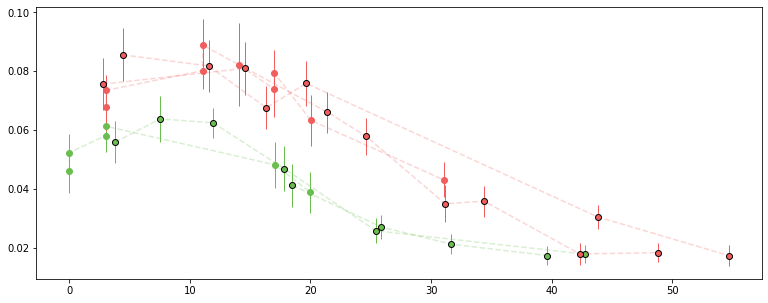

In [114]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_curve_generators import SynSNeGeneratorCF, SynSNeGeneratorMCMC
from lchandler.plots.lc import plot_lightcurve
from flamingchoripan.datascience.statistics import XError
import matplotlib.pyplot as plt
from lchandler import C_

lcobj = lcdataset['raw'].get_random_lcobj(return_key=0)
band_names = lcdataset['raw'].band_names
sne_generator = SynSNeGeneratorCF(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict)
#sne_generator = SynSNeGeneratorMCMC(lcobj, band_names, obse_sampler_bdict, length_sampler_bdict)
new_lcobjs = sne_generator.sample_curves(2)

fig, ax = plt.subplots(1,1,figsize=(13,5))
for b in band_names:
    plot_lightcurve(ax, lcobj, b)
    for new_lcobj in new_lcobjs:
        plot_lightcurve(ax, new_lcobj, b, is_synthetic=1)
        
plt.plot()

# generate synth data

In [117]:
%load_ext autoreload
%autoreload 2
from lchandler.synthetic.synthetic_dataset_generator import generate_synthetic_dataset

sd_kwargs = {
    #'get_from_synthetic':False,
    'synthetic_samples_per_curve':64,
    #'method':'curve_fit',
    'method':'mcmc',
    #desired_class_samples:2000,
    #desired_class_samples = 1000; get_from_synthetic = True # for umap
}
generate_synthetic_dataset(lcdataset, 'train', obse_sampler_bdict, length_sampler_bdict, **sd_kwargs)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
  0%|          | 0/874 [?it/s, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acfwynw]

There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


  0%|          | 3/874 [72.67s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaqrime]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  0%|          | 4/874 [94.35s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acnnevs]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|          | 5/874 [99.39s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaserwb]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|          | 8/874 [103.59s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abclykm]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|          | 9/874 [129.65s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aalbrgu]

The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|          | 10/874 [170.72s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abslpjy]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  1%|▏         | 13/874 [173.22s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abaeyqw]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


  2%|▏         | 14/874 [150.50s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abpbopt]

The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 15/874 [182.70s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aanesgt]

There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


  2%|▏         | 16/874 [181.78s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18abshezu]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 17/874 [162.73s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acgcshq]

There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 18/874 [171.11s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19acewotx]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 19/874 [185.04s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19abzzhgx]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  2%|▏         | 21/874 [155.78s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acmvcme]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  3%|▎         | 23/874 [203.91s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aaripqw]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  3%|▎         | 29/874 [194.92s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aaxkfos]

There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  3%|▎         | 30/874 [177.71s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18aazjztm]

There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


  4%|▎         | 31/874 [174.55s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF19aamvmer]

The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


  4%|▎         | 32/874 [177.47s/it, method: mcmc - add_original: True - set_name: train - lcobj_name: ZTF18acnbeuu]


KeyboardInterrupt: 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


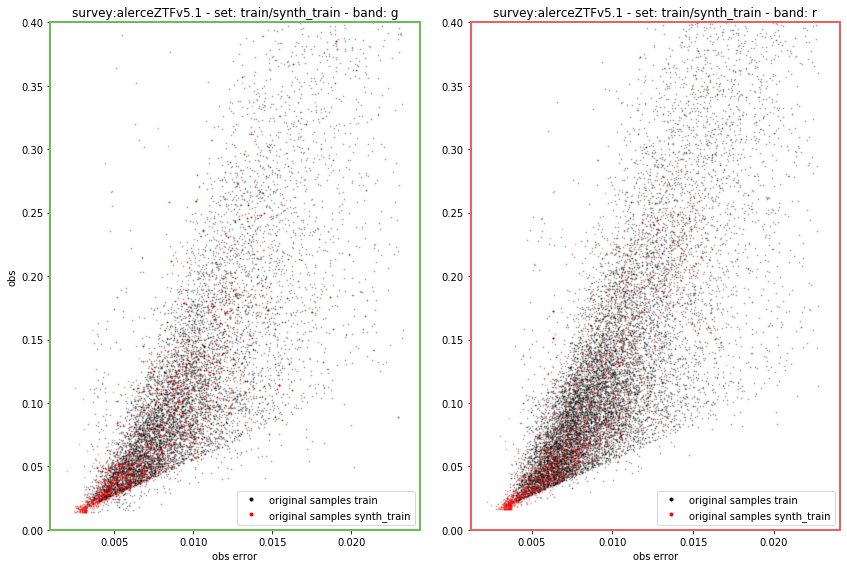

In [118]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.plots import plot_obs_obse_scatter

plot_obs_obse_scatter(lcdataset, 'train', 'synth_train')

In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc
import flamingchoripan.cutePlots.plots as cplots

figsize = (12,5)
fig, ax = plt.subplots(1, 1, figsize=figsize)
for ks,set_name in enumerate(['synth_train']):
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_synthetic_samples

plot_synthetic_samples(lcdataset, 'train', max_samples=1)

In [ ]:
%load_ext autoreload
%autoreload 2
from src.umaps import get_fitted_umap, get_transformed_umap

set_name_train = 'train'
set_name_test = 'synth_train'
30
pm_umap_results = get_fitted_umap(lcdataset, set_name_test)
res = get_transformed_umap(lcdataset, pm_umap_results, set_name_train, set_name_test)
pm_args_embd_results_train, pm_args_embd_results_test = res

In [ ]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_2Dprojections

for c in [None]+lcdataset.raw.class_names:
    kwargs = {
        'target_class':c,
        #'x_mode':'x_pca',
        'x_mode':'x_umap',
        'x_mode':'x_tsne',
    }
    plot_2Dprojections(lcdataset, set_name_train, pm_args_embd_results_train, set_name_test, pm_args_embd_results_test, **kwargs)

In [ ]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

assert 0
save_filedir = f'{root_folder}/{cfilename}.{C_.EXT_PARAMETRIC_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)